# Discovering Underlying Topics in Newsgroups Dataset with Clustering and Topic Modeling

## Implementing k-means from scratch

#### using 2 features of the original 4 to simplify the example:
#### Three colors are chosen for the plot, as the dataset contains three iris classes.

In [3]:
from sklearn import datasets 
iris = datasets.load_iris()
X = iris.data[:, 2:4]
y = iris.target
import numpy as np
from matplotlib import pyplot as plt

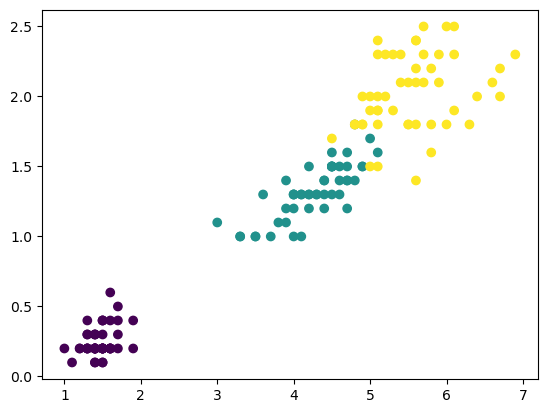

In [4]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

#### Specifying k and initializing centroids by randomly selecting three samples as the initial centroids:

In [5]:
k = 3
np.random.seed(0)
random_index = np.random.choice(range(len(X)), k)
centroids = X[random_index]

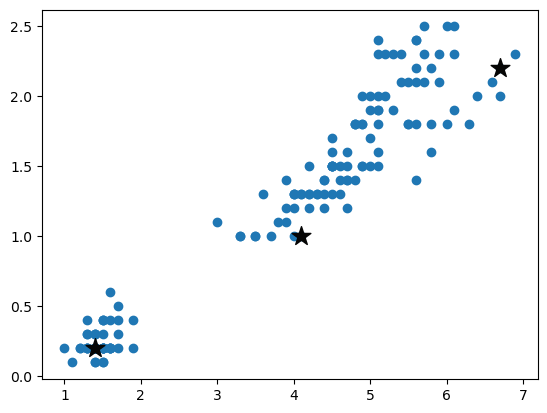

In [6]:
def visualize_centroids(X, centroids):
    plt.scatter(X[:,0], X[:, 1])
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
    plt.show()
visualize_centroids(X, centroids)

#### Now in the third step 3, assigning clusters based on the nearest centroids.
#### To do this first need to define a function calculating the distance (Euclidean)

In [7]:
def dist(a, b):
    return np.linalg.norm(a - b, axis=1)

In [8]:
def assign_cluster(x, centroids):
    distances = dist(x, centroids)
    cluster = np.argmin(distances)
    return cluster

In [9]:
def update_centroids(X, centroids, clusters):
    for i in range(k):
        cluster_i = np.where(clusters == i)
        centroids[i] = np.mean(X[cluster_i], axis=0)     

#### Step 5, repeating steps 3 and 4 until the model converges and when one of the following occurs:
####  -centroids move less than the pre-specified threshold
####  -sufficient iterations have been taken

In [10]:
# Setting the tolerance and the number of iterations
tol = 0.0001
max_iter = 100

iter = 0 
centroids_diff = 100000
clusters = np.zeros(len(X))

Iteration: 1
Centroids:
 [[1.462      0.246     ]
 [5.80285714 2.11142857]
 [4.42307692 1.44153846]]
Centroids move: 1.0574


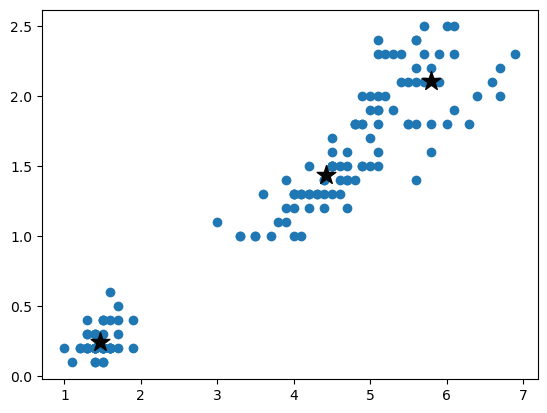

Iteration: 2
Centroids:
 [[1.462      0.246     ]
 [5.73333333 2.09487179]
 [4.37704918 1.40819672]]
Centroids move: 0.0913


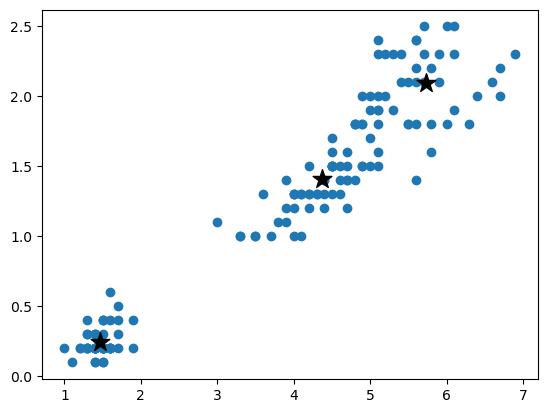

Iteration: 3
Centroids:
 [[1.462      0.246     ]
 [5.68333333 2.08095238]
 [4.34310345 1.38275862]]
Centroids move: 0.0670


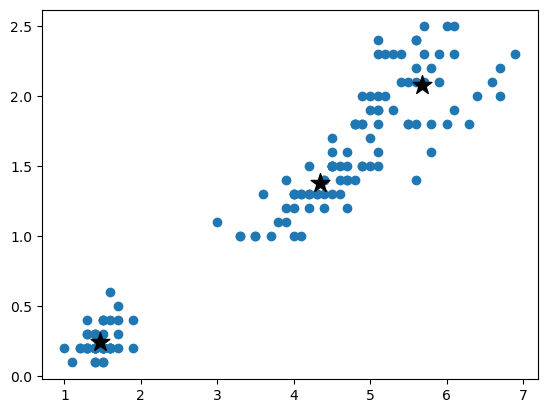

Iteration: 4
Centroids:
 [[1.462      0.246     ]
 [5.65227273 2.06818182]
 [4.31964286 1.36785714]]
Centroids move: 0.0436


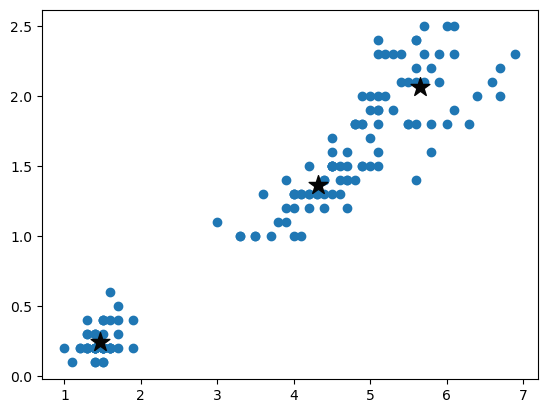

Iteration: 5
Centroids:
 [[1.462      0.246     ]
 [5.63777778 2.06      ]
 [4.30727273 1.36181818]]
Centroids move: 0.0216


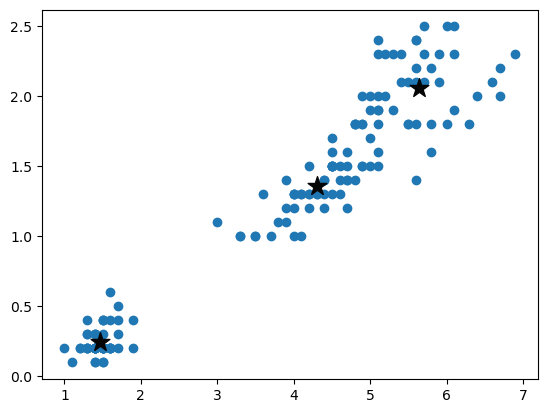

Iteration: 6
Centroids:
 [[1.462      0.246     ]
 [5.62608696 2.04782609]
 [4.29259259 1.35925926]]
Centroids move: 0.0225


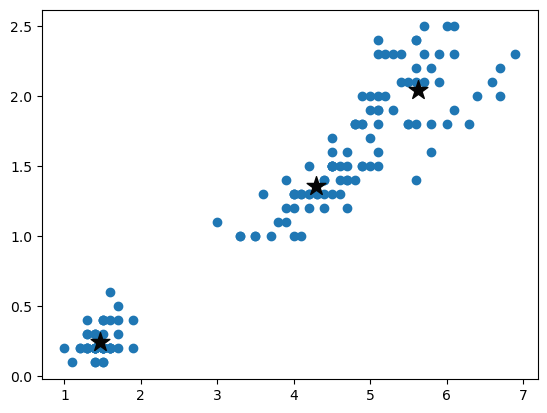

Iteration: 7
Centroids:
 [[1.462      0.246     ]
 [5.62608696 2.04782609]
 [4.29259259 1.35925926]]
Centroids move: 0.0000


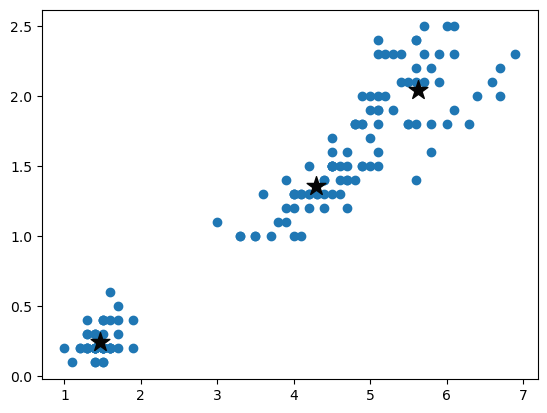

In [11]:
from copy import deepcopy
while iter < max_iter and centroids_diff > tol:
    for i in range(len(X)):
        clusters[i] = assign_cluster(X[i], centroids)
    centroids_prev = deepcopy(centroids)
    update_centroids(X, centroids, clusters)
    iter += 1
    centroids_diff = np.linalg.norm(centroids - centroids_prev)
    print('Iteration:', str(iter))
    print('Centroids:\n', centroids)
    print(f'Centroids move: {centroids_diff:5.4f}')
    visualize_centroids(X, centroids)


### Convergence in the model occurs after seven iterations. Plotting the clusters:

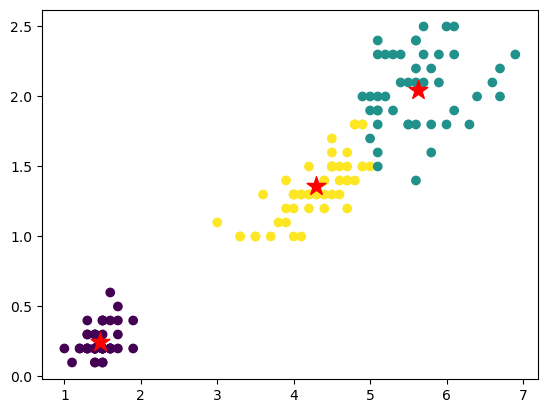

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='r')
plt.show()

## Implementing k-means with scikit-learn

In [13]:
from sklearn.cluster import KMeans
kmeans_sk = KMeans(n_clusters=3, n_init='auto', random_state=42)


In [14]:
kmeans_sk.fit(X)

C:\Users\S\.conda\envs\PyMLbyExample\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\S\.conda\envs\PyMLbyExample\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\S\.conda\envs\PyMLbyExample\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\S\.conda\envs\PyMLbyExample\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\S\.conda\envs\PyMLbyExample\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(exec

KMeans(n_clusters=3, random_state=42)

In [15]:
clusters_sk = kmeans_sk.labels_
centroids_sk = kmeans_sk.cluster_centers_

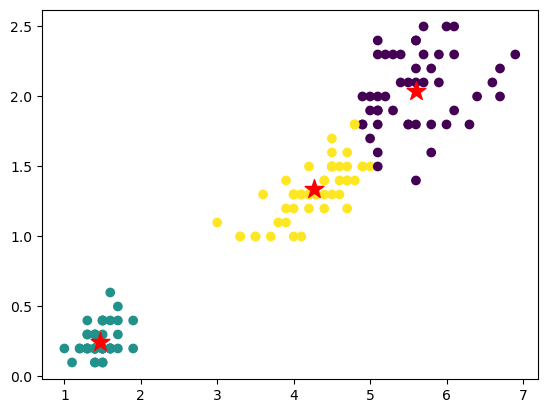

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=clusters_sk)
plt.scatter(centroids_sk[:, 0], centroids_sk[:, 1], marker='*', s=200, c='r')
plt.show()

## Choosing the value of k

In [17]:
X = iris.data
y = iris.target
k_list = list(range(1, 7))
sse_list = [0] * len(k_list)

In [18]:
for k_ind, k in enumerate(k_list):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(X)
    clusters = kmeans.labels_
    centroids = kmeans.cluster_centers_
    sse = 0
    for i in range(k):
        cluster_i = np.where(clusters == i)
        sse += np.linalg.norm(X[cluster_i] - centroids[i])
    print(f'k={k}, SSE={sse}')
    sse_list[k_ind] = sse
    

k=1, SSE=26.10307644703973
k=2, SSE=16.469773740281195
k=3, SSE=15.121600931008919
k=4, SSE=15.017339707107098
k=5, SSE=14.893998773455875
k=6, SSE=14.918158375259381


C:\Users\S\.conda\envs\PyMLbyExample\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\S\.conda\envs\PyMLbyExample\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\S\.conda\envs\PyMLbyExample\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\S\.conda\envs\PyMLbyExample\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

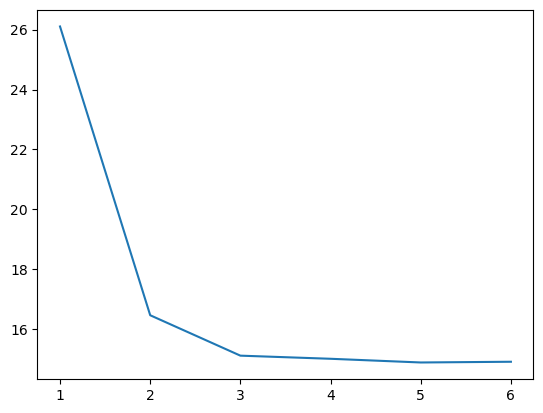

In [19]:
plt.plot(k_list, sse_list)
plt.show()

## Clustering newsgroups dataset

### clustering newsgroups datas using k-means

In [20]:
from sklearn.datasets import fetch_20newsgroups

categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]

groups = fetch_20newsgroups(subset='all', categories=categories)

labels = groups.target
label_names = groups.target_names

In [21]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import names
all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

def get_cleaned_data(groups, lemmatizer, remove_words):
    data_cleaned = []

    for doc in groups.data:
        doc = doc.lower()
        doc_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in doc.split() if word.isalpha() and word not in remove_words)
        data_cleaned.append(doc_cleaned)
        
    return data_cleaned

data_cleaned = get_cleaned_data(groups, lemmatizer, all_names)



### Converting the cleaned text data into count vectors with CountVectorizer
#### The min_df and max_df are 2% and 50% of the dataset respectively Document frequency for a word is mesured by the fraction of documents(samples)
#### in the dataset containing this word. 

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(stop_words="english", max_features=None, max_df=0.5, min_df=2)
data_cv = count_vector.fit_transform(data_cleaned)

#### Clustering into 4 groups:

In [23]:
from sklearn.cluster import KMeans
k = 4
kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)

kmeans.fit(data_cv)

KMeans(n_clusters=4, random_state=42)

#### Checking the cluster sizes produced:

In [27]:
clusters = kmeans.labels_
from collections import Counter
print(Counter(clusters)) 


Counter({3: 3370, 0: 13, 1: 3, 2: 1})


### For a better numerical representation (to improve upon the previous count-based feature approach) the *tf-idf* Term Frequency-Inverse Document Frequency
###  is used. Term frequency (tf) assigns each term frequncy a weighting factor inversely proportional to the document frequency.
### The goal is to diminish the weight of common terms (e.g. 'get', 'take') and emphasize terms conveying and important meaning but are rarely occuring.

In [28]:
 from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer(stop_words='english', max_features=None, max_df=0.5, min_df=2)

### Redoing the factor vectorization using the tf-df vectorizer and the k-means clustering algorithm on the feature space:

In [29]:
data_tv = tfidf_vector.fit_transform(data_cleaned)
kmeans.fit(data_tv)
clusters = kmeans.labels_
print(Counter(clusters))

Counter({2: 1206, 0: 1196, 3: 742, 1: 243})


In [37]:
cluster_label = {i: labels[np.where(clusters == i)] for i in range(k)}

terms = tfidf_vector.get_feature_names_out()
centroids = kmeans.cluster_centers_
for cluster, index_list in cluster_label.items():
    counter = Counter(cluster_label[cluster])
    print(f'cluster_{cluster}: {len(index_list)} samples')
    for label_index, count in sorted(counter.items(), key=lambda x: x[1], reverse=True):
        print(f'- {label_names[label_index]}: {count} samples')
    print('Top 10 terms:')
    for ind in centroids[cluster].argsort()[-10:]:
        print('%s ' % terms[ind], end="")
    print('\n')



cluster_0: 1196 samples
- alt.atheism: 618 samples
- talk.religion.misc: 524 samples
- sci.space: 35 samples
- comp.graphics: 19 samples
Top 10 terms:
ha just jesus think christian people say article god wa 

cluster_1: 243 samples
- alt.atheism: 112 samples
- sci.space: 88 samples
- talk.religion.misc: 35 samples
- comp.graphics: 8 samples
Top 10 terms:
moral article comet institute pasadena keith ray gamma california allan 

cluster_2: 1206 samples
- comp.graphics: 942 samples
- sci.space: 134 samples
- talk.religion.misc: 65 samples
- alt.atheism: 65 samples
Top 10 terms:
thanks need looking know computer program file university graphic image 

cluster_3: 742 samples
- sci.space: 730 samples
- comp.graphics: 4 samples
- talk.religion.misc: 4 samples
- alt.atheism: 4 samples
Top 10 terms:
hst mission just moon article nasa launch shuttle wa space 



### Discovering underlying Topics in Newsgroups: Topic modeling using Non-Negative Matrix Factorization (NMF)
#### NMF is a technique for reducting dimensionality in feature extraction and data representation. It factors a non-negative input 
#### matrix V, into a product of two smaller matrices W and H, such that the three matrices have no negative values
#### The two lower dimensional matrices represent features and their associated coefficients. 

### In NLP these matrices represent: V is the terem count or tf-idf matrix of size n * m
### where n is the number of document samples and m is the number of terms.

### W is the feature matrix of size t * m  (t is the number of topics specified). Each row of W represents a topic.

### Matrix H is the coefficient matrix of size n * t .  Each H represents a document, and each element in the row a weight of the topic.

In [43]:
from sklearn.decomposition import NMF

t = 20
nmf = NMF(n_components=t, random_state=42)

In [44]:
nmf.fit(data_cv)

print(nmf.components_)



[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.82943860e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  7.79369242e-04 3.87306064e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.71128084e-02
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 4.29898976e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [45]:
terms_cv = count_vector.get_feature_names_out()
for topic_idx, topic in enumerate(nmf.components_):
        print("Topic {}:" .format(topic_idx))
        print(" ".join([terms_cv[i] for i in topic.argsort()[-10:]]))

Topic 0:
available quality program free color version gif file image jpeg
Topic 1:
ha article make know doe say like just people think
Topic 2:
include available analysis user software ha processing data tool image
Topic 3:
atmosphere kilometer surface ha earth wa planet moon spacecraft solar
Topic 4:
communication technology venture service market ha commercial space satellite launch
Topic 5:
verse wa jesus father mormon shall unto mcconkie lord god
Topic 6:
format message server object image mail file ray send graphic
Topic 7:
christian people doe atheism believe religion belief religious god atheist
Topic 8:
file graphic grass program ha package ftp available image data
Topic 9:
speed material unified star larson book universe theory physicist physical
Topic 10:
planetary station program group astronaut center mission shuttle nasa space
Topic 11:
infrared high astronomical center acronym observatory satellite national telescope space
Topic 12:
used occurs true form ha ad premise con

## Topic modeling using  Latent Dirichlet Allocation (LDA)

### LDA is a generative probabilistic graphical model that explains each input document by means of a mixture of topics with 
### certain probabilities. Assumption: Each document contains a mixture of multiple topics, each characterized by a 
### specific word probability distribution.

### The resulting topic term rank after training:

In [46]:
from sklearn.decomposition import LatentDirichletAllocation
t = 20
lda = LatentDirichletAllocation(n_components=t, learning_method='batch',random_state=42)
lda.fit(data_cv)

print(lda.components_)

[[0.05       0.05       0.05       ... 0.05       0.05       0.05      ]
 [0.05       0.05       0.05       ... 0.05       0.05       0.05      ]
 [0.05       0.05       0.05       ... 0.05       0.05       0.05      ]
 ...
 [0.05000001 0.05       0.05       ... 0.05       0.05       0.05      ]
 [0.05       0.05       0.05       ... 0.05       2.05       0.05      ]
 [0.05       0.05       0.05       ... 0.05       0.05       0.05      ]]


### For each topic, the top 10 terms based on their ranks:

In [47]:
for topic_idx, topic in enumerate(lda.components_):
        print("Topic {}:" .format(topic_idx))
        print(" ".join([terms_cv[i] for i in topic.argsort()[-10:]]))

Topic 0:
human animal atom natural morality ha universe physical theory wa
Topic 1:
research doe like routine center university polygon nasa article point
Topic 2:
view like university gopher search rushdie muslim article islam islamic
Topic 3:
university doe wa problem spencer henry new zoology article toronto
Topic 4:
probe launch earth spacecraft solar orbit mission satellite space wa
Topic 5:
group energy think government rocket like article just wa space
Topic 6:
people homosexual think gamma article sex want like just wa
Topic 7:
use format version program bit gif color jpeg file image
Topic 8:
did think article good believe god know just people wa
Topic 9:
design mission ha option space article station hst shuttle wa
Topic 10:
make people religion christian belief wa doe ha say god
Topic 11:
just cost year wa shuttle university ha space article launch
Topic 12:
ha orbit ray just know gamma day like wa article
Topic 13:
know like make moral article right people just think wa
Topi